In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
ds = pd.read_csv("haberman.csv")# reading csv file 
print("No of datapoints and features are :",ds.shape)
print("No of classes and datapoints in each class:",ds['ss'].value_counts())
ds.describe()# summary of the whole dataset


No of datapoints and features are : (306, 4)
No of classes and datapoints in each class: 1    225
2     81
Name: ss, dtype: int64


,age,yop,pan,ss
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


***observation**
We have haberman dataset which states cancer diagnostics that the survival_status 
of a patient 

in this dataset we have 4 classes those are 
age,yop,pan,ss

#here in dataset the column names are 

   * age - age of a patient 
   * yop - year of operation done to patient
   * pan - positive axillary nodes detected 
   * ss  - survive status

***Objective***

The main objective of this dataset is the surviva rate of patients who
undergone the surgery in year between(1958-1970)
and how many patients will more_survive and how many less-survive,

***Observations***
In above dataset survive_status is dependent variable and remaining are independent
variables.

The age b/w the patient's are 30-83 
The operation year b/w 1958-1970 
The No of positive axillary nodes detected in a patient in b/w 0 - 52
The survival_status are 1 and 2 
1 = A patient can survive >= 5 years
2 = A patient can survive < 5 years(Patient may died within 5 Years)

The classes 1 and 2 give different 225 and 81 which will considered as slightly imbalanced dataset 

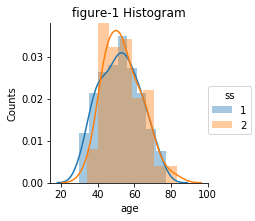

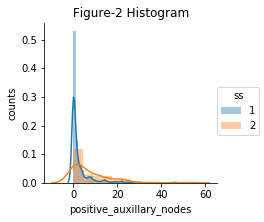

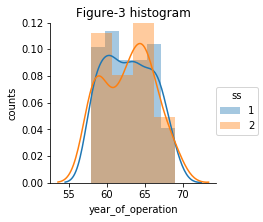

In [199]:
# *** PDF_Histogram ***
import warnings
warnings.filterwarnings("ignore")

sns.FacetGrid(ds, hue="ss", ) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("figure-1 Histogram")
plt.xlabel("age")
plt.ylabel("Counts")
plt.show()

sns.FacetGrid(ds,hue="ss") \
   .map(sns.distplot,"pan") \
   .add_legend()
plt.title("Figure-2 Histogram")
plt.xlabel("positive_auxillary_nodes")
plt.ylabel("counts")
plt.show()

sns.FacetGrid(ds,hue="ss") \
   .map(sns.distplot, "yop") \
   .add_legend()
plt.title("Figure-3 histogram")
plt.xlabel("year_of_operation")
plt.ylabel("counts")
plt.show()

***Observations_in_histogram***
*The features  age and yop are fully overlapped 
*The feature pan slightly better like not good and not fully overlapped 
*According to histogram pan(POSITIVE_AXILLARY_NODES) feature will give better histogram visualization
***pan>>age>>yop***

age-PDF : [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
age-BINEDGES : [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
age-CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


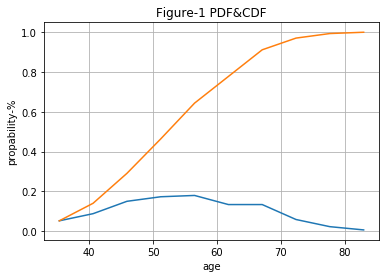

yop-PDF : [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
yop-BINEDGES : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
yop-CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


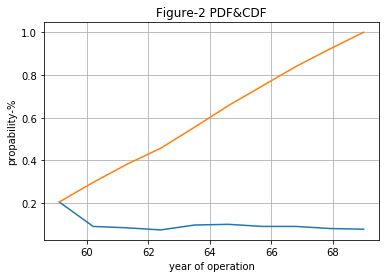

pan-PDF : [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
pan-BINEDGES : [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
pan-CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


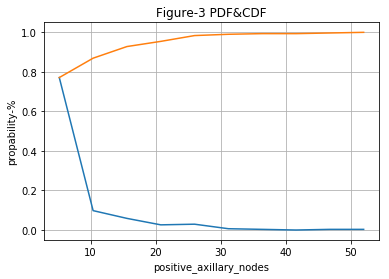

In [196]:
#UNIVARIANT ANALYSIS PDF & CDF

counts, binedges = np.histogram(ds["age"], bins=10, density = True)
pdf = counts/(sum(counts)) #here pdf means caluclating how many point's are lying at particular points
print("age-PDF :",pdf)
print("===============================================================================")
print("age-BINEDGES :",binedges) #storing the values in bin wise 10 values storoed in 1 bin
print("===============================================================================")
cdf = np.cumsum(pdf) # here cdf means adding sum of all pdf's will get cdf

print("age-CDF:",cdf)
plt.title("Figure-1 PDF&CDF")
plt.xlabel("age")
plt.ylabel("propability-%")
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:], cdf)
plt.grid()
plt.show()

counts, binedges = np.histogram(ds["yop"], bins=10, density = True)
pdf = counts/(sum(counts)) #here pdf means caluclating how many point's are lying at particular points
print("yop-PDF :",pdf)
print("===============================================================================")
print("yop-BINEDGES :",binedges) #storing the values in bin wise 10 values storoed in 1 bin
print("===============================================================================")
cdf = np.cumsum(pdf) # here cdf means adding sum of all pdf's will get cdf

print("yop-CDF:",cdf)
plt.title("Figure-2 PDF&CDF")
plt.xlabel("year of operation")
plt.ylabel("propability-%")
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:], cdf)
plt.grid()
plt.show()


counts, binedges = np.histogram(ds["pan"], bins=10, density = True)
pdf = counts/(sum(counts)) #here pdf means caluclating how many point's are lying at particular points
print("pan-PDF :",pdf)
print("===============================================================================")
print("pan-BINEDGES :",binedges) #storing the values in bin wise 10 values storoed in 1 bin
print("===============================================================================")
cdf = np.cumsum(pdf) # here cdf means adding sum of all pdf's will get cdf

print("pan-CDF:",cdf)
plt.title("Figure-3 PDF&CDF")
plt.xlabel("positive_axillary_nodes")
plt.ylabel("propability-%")
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:], cdf)
plt.grid()
plt.show()

***Observaton in pdf & cdf***

In figure-1 61 % of patients age group  is < = 57
In figure-2 20% of patients operations done in  < = 1959 year
In figure-3 79% of positive-auxillary_nodes < =4

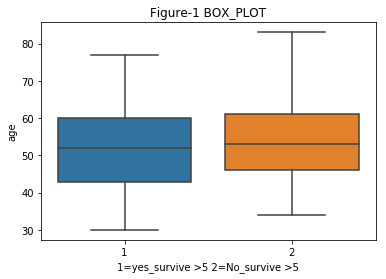

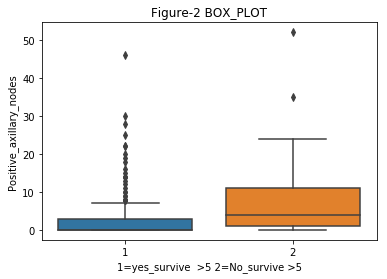

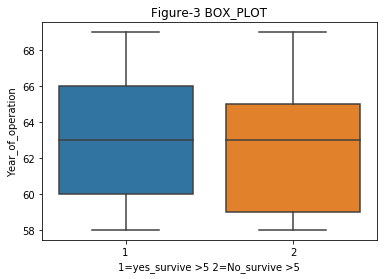

In [197]:
#Box_plots

sns.boxplot(data=ds, x="ss",y="age")
plt.title("Figure-1 BOX_PLOT")
plt.xlabel("1=yes_survive >5 2=No_survive >5")
plt.show()

sns.boxplot(data=ds,x='ss',y='pan')    
plt.title("Figure-2 BOX_PLOT")
plt.xlabel("1=yes_survive  >5 2=No_survive >5")
plt.ylabel("Positive_axillary_nodes")
plt.show()

sns.boxplot(data=ds,x='ss',y='yop')    
plt.title("Figure-3 BOX_PLOT")
plt.xlabel("1=yes_survive >5 2=No_survive >5")
plt.ylabel("Year_of_operation")
plt.show()

***observations in boxplot***
In figure-1 if patients age >=64 has lesser chance to survive >5 years 
In figure-2 patients who have > 6 positive-auxilary_nodes has fewer chance to survive >5 years 
In figure-3 In the year of operation of  patients  <=1958  has lesser chance to survive >5 years


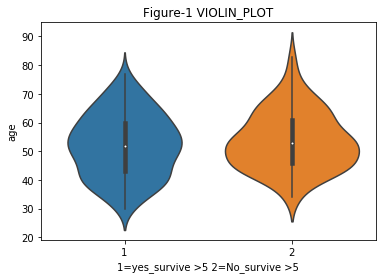

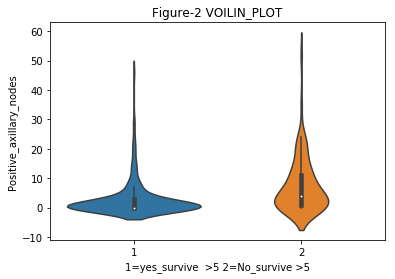

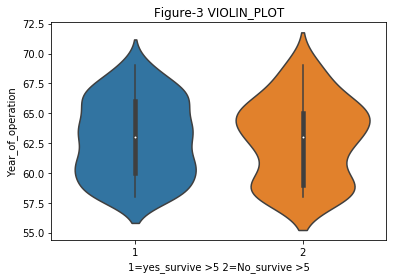

In [198]:
#violin_plot 

#plt.subplot(221)
sns.violinplot(data=ds, x="ss",y="age" ,size=5)
plt.title("Figure-1 VIOLIN_PLOT")
plt.xlabel("1=yes_survive >5 2=No_survive >5")
plt.show()

#plt.subplot(222)
sns.violinplot(data=ds,x='ss',y='pan',size=5) 
plt.title("Figure-2 VOILIN_PLOT")
plt.xlabel("1=yes_survive  >5 2=No_survive >5")
plt.ylabel("Positive_axillary_nodes")
plt.show()

#plt.subplot(223)
sns.violinplot(data=ds,x='ss',y='yop',size=5)    
plt.title("Figure-3 VIOLIN_PLOT")
plt.xlabel("1=yes_survive >5 2=No_survive >5")
plt.ylabel("Year_of_operation")
plt.show()

***observations
in figure-2 densoe region has more points lying in 0 it states that most of patients has 0 positive_auxillary_nodes not exactly in numerical but it shows how many lyes in that region 

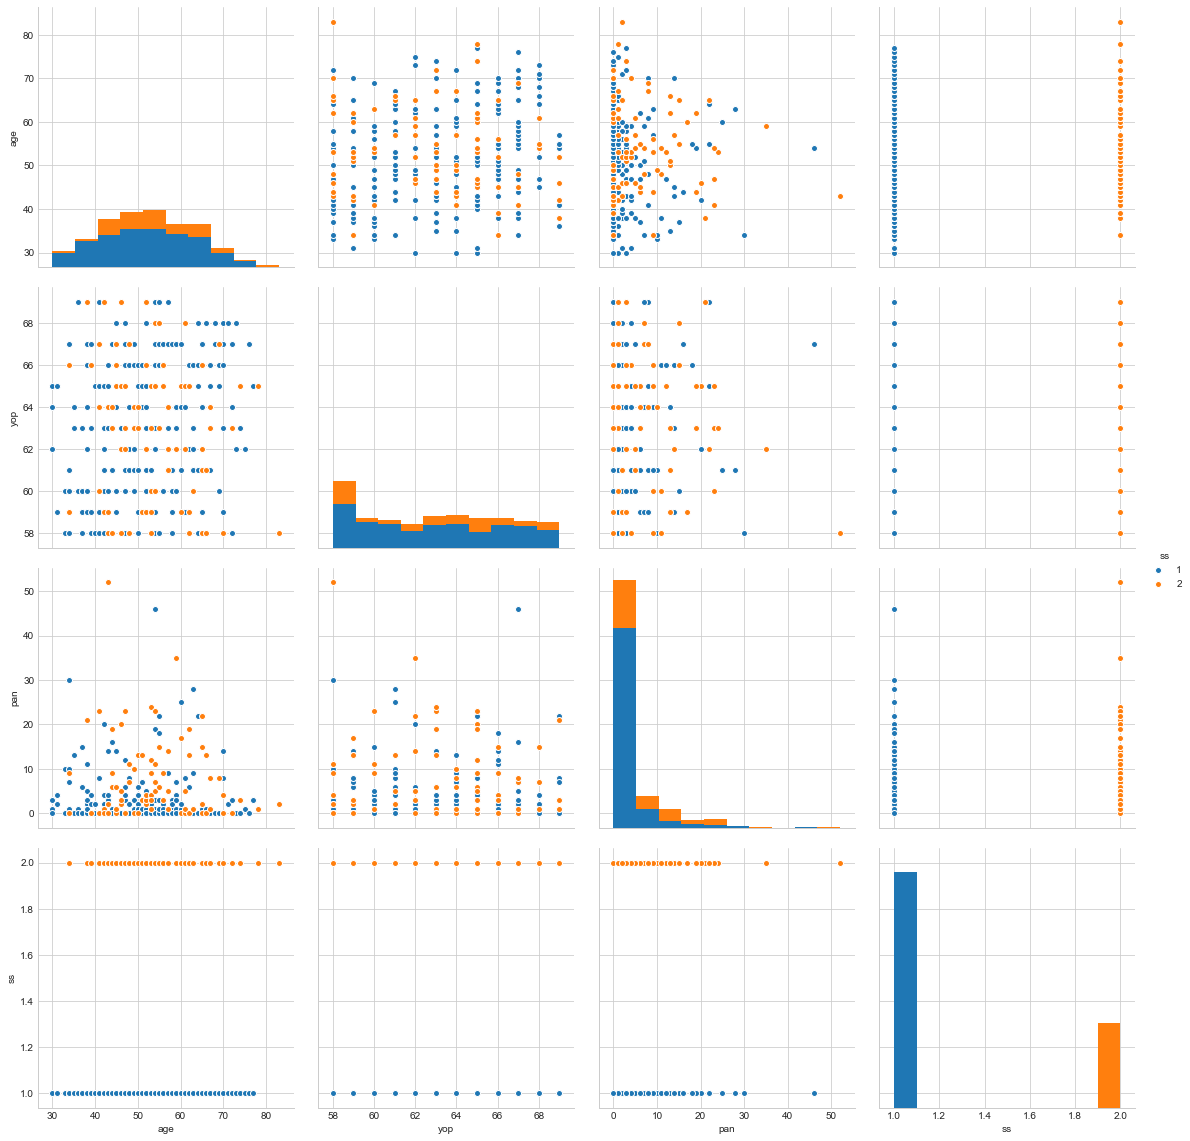

In [210]:
#Bi-variant_analysis
#pair_plots

sns.set_style("whitegrid")
sns.pairplot(data=ds,hue="ss",size=4)
plt.show()


***Here in pair plots yop(year_of_opearion) and pan(positive_auxillary_nodes)  and survive_status(ss) will give better features for classification 
in Year_of_operation(yop) feature shows better seperatable 
Positive_auxillary_nodes also will slightly overlap but it is also give good not much as yop 
ss->ss shows clearly that how many patients survive rate is >= 5 years and <=5years

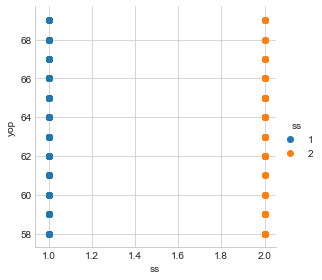

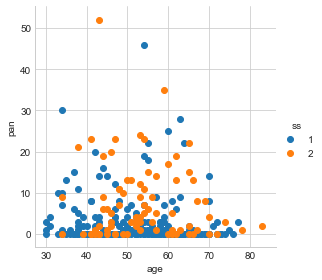

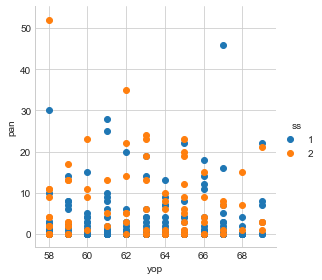

In [230]:
#Scatter_plots
sns.set_style("whitegrid")
sns.FacetGrid(data=ds,hue="ss",size=4) \
   .map(plt.scatter,"ss","yop") \
   .add_legend()
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(data=ds,hue="ss",size=4) \
   .map(plt.scatter,"age","pan") \
   .add_legend()
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(data=ds,hue="ss",size=4) \
   .map(plt.scatter,"yop","pan") \
   .add_legend()
plt.show()

***observation
Here only Year_of_opt ~ Survival_status & Positive_auxillary_nodes ~ survival_status give meaningfull seperations rest of remaining features are overlapped not good as explainable



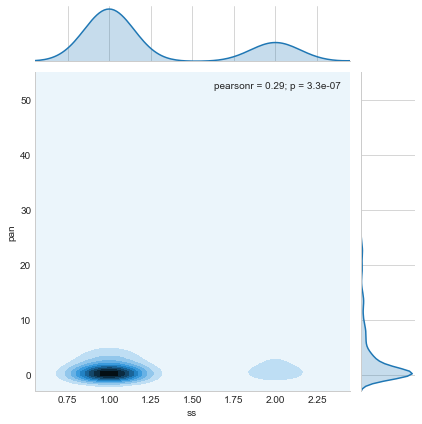

In [233]:
#Multivariant_analysis

sns.jointplot(x="ss",y="pan",kind="kde",data=ds)
plt.show()

***observations
More Color states that more of points lies in 1 survive  and 0 in Positive-auxillary_nods 
At datapoint 1 in ss has more denser towards to datapoint 0 in positive_auxillary_node 
and remaining only fewer points at ss datapoint 2

***Final Observations***

***Each and every observations was written below of each and every analysis,
Overall analysis is there is a 80% of patient's are can survive greater then or equal 5 Years
and remaining 20% patient's are less chance to survive greater than 5 year's they may be survive lessthan 5 years 
Datashould be slightly imbalanced.***